# Financial Inclusion In Africa
- Predict who in Africa is most likely to have a bank account
- The **evaluation metric** for this challenge is **Mean Absolute error**, where 1 indicates that the individual does have a bank account and 0 indicates that they do not.
- You are asked to predict the likelihood of the person having a bank account or not (Yes = 1, No = 0), for each unique id in the test dataset . You will train your model on 70% of the data and test your model on the final 30% of the data, across four East African countries - Kenya, Rwanda, Tanzania, and Uganda.
### Variable Definition
- *country*: Country interviewee is in
- *year* : Year survey was done in
- *uniqueid* : Unique identifier each for interviewee
- *location_type* : Type of location: Rural, Urban
- *cellphone_acces* : If interviewee has access to a cellphone:Yes,No
- _household_size_ : Number of people living in one house
- *age_of_respondent* : The  age of the interviewee
- *gender_of_respondent* : Gender of interviewee: Male,Female
- *relationship_with_head* : The interviewee's relationship with the head of the house:Head of Household ,Spouse ,Child, Parent, Other relative, Other non-relative, Dont know
- *marital_status* : The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married ,Don't know
- *education_level* : Highest level of education:No formal education, Primary education, Secondary education, Vational/Specialised training, Tertiary education, Other/Dont know/RTA
- *job_type* :Type of jobs interviewee has: Farmong and Fishing, Self employed, Formally employed Goverment, Formally employed, Remittance Dependent, Goverment Dependent, Other Income, No Income, Dont Know/Refuse to answer
### How to get the Data
- The data was downloaded from Zindi.africa web site  
https://zindi.africa/competitons/financial-inclusion-in-africa/data

# Table of content
<a class='nkybz' id='TOC'></a>
1. [Importing libraries](#1)
1. [loading Data](#2)
1. [breif look at all the data](#3)
1. [Encoding](#4)
1. [Handling Missing value](#5)<br>
    [5.1 Explore](#5.1)
1. [Handling Outliers](#6)
1. [TransFormation](#7)
1. [Feature Engineering](#8)
1. [Feature Selection](#9)
1. [model Prep](#10)
1. [Feature Importance](#11)
1. [Modeling](#12)
1. [Ensemble](#13)

# Importing libraries <a class='nkybz' id='1'></a>
[Back to Table of Content](#TOC)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
#sns.set(style="darkgrid")
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 150)

# 2.Loading Data <a class='nkybz' id='2'></a>
[Back to Table of Content](#TOC)

In [4]:
train = pd.read_csv('Data/Train_v2.csv')
test = pd.read_csv('Data/Test_v2.csv')
#sub = pd.read_csv('Data/SampleSubmission.csv')
train['uniqueid'] = train['uniqueid']+str(' x ')+train['country']
test['uniqueid'] = test['uniqueid']+str(' x ')+test['country']
train.set_index("uniqueid",inplace=True)
test.set_index("uniqueid",inplace=True)
test['Target'] =0

# 3.Breif Look at the Data <a class='nkybz' id='3'></a>
[Back to Table of Content](#TOC)

In [5]:
print('Train shape :: ',train.shape)
print('competition test shape :: ',test.shape)
#print('Sample submission :: ',sub.shape)

Train shape ::  (23524, 12)
competition test shape ::  (10086, 12)


In [6]:
#sub.head(2)


In [7]:
display(test.head(3))
display(train.head(3))

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Target
uniqueid,,,,,,,,,,,,
uniqueid_6056 x Kenya,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,0
uniqueid_6060 x Kenya,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,0
uniqueid_6065 x Kenya,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0


,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
uniqueid,,,,,,,,,,,,
uniqueid_1 x Kenya,Kenya,2018,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Yes
uniqueid_2 x Kenya,Kenya,2018,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,No
uniqueid_3 x Kenya,Kenya,2018,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Yes


In [8]:
display(train.describe(include=object))
display(train.describe())

,country,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
count,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,2,2,2,6,5,6,10,2
top,Rwanda,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed,No
freq,8735,14343,17454,13877,12831,10749,12791,6437,20212


,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23524 entries, uniqueid_1 x Kenya to uniqueid_2117 x Uganda
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   location_type           23524 non-null  object
 3   cellphone_access        23524 non-null  object
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
 11  bank_account            23524 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.3+ MB


In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(train,train['bank_account'],test_size=0.3,stratify=train['bank_account'],
                                            random_state=211)
print("xtrain.shape :: ",xtrain.shape)
print('xtest.shape :: ',xtest.shape)

xtrain.shape ::  (16466, 12)
xtest.shape ::  (7058, 12)


# Basic Summaries

In [11]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16466 entries, uniqueid_3200 x Tanzania to uniqueid_5835 x Tanzania
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 16466 non-null  object
 1   year                    16466 non-null  int64 
 2   location_type           16466 non-null  object
 3   cellphone_access        16466 non-null  object
 4   household_size          16466 non-null  int64 
 5   age_of_respondent       16466 non-null  int64 
 6   gender_of_respondent    16466 non-null  object
 7   relationship_with_head  16466 non-null  object
 8   marital_status          16466 non-null  object
 9   education_level         16466 non-null  object
 10  job_type                16466 non-null  object
 11  bank_account            16466 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


In [12]:
xtrain.loc[:,xtrain.dtypes == object].columns

Index(['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'bank_account'],
      dtype='object')

In [13]:
xtrain.nunique()

country                    4
year                       3
location_type              2
cellphone_access           2
household_size            19
age_of_respondent         84
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
bank_account               2
dtype: int64

In [14]:
xtrain.isna().sum().any(),xtest.isna().sum().any(),test.isna().sum().any()

(False, False, False)

In [15]:
cat_cols = xtrain.loc[:,xtrain.dtypes == object].columns
cat_cols = cat_cols.drop(['bank_account'])
xtrain[cat_cols].nunique()

country                    4
location_type              2
cellphone_access           2
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
dtype: int64

In [16]:
xtrain[cat_cols].describe()

,country,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,16466,16466,16466,16466,16466,16466,16466,16466
unique,4,2,2,2,6,5,6,10
top,Rwanda,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,6100,10010,12184,9699,8945,7513,8919,4537


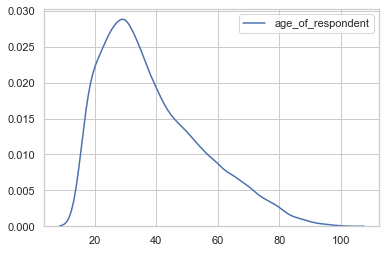

In [17]:
sns.kdeplot(xtrain['age_of_respondent'])

In [18]:
#sns.displot(xtrain['age_of_respondent'])

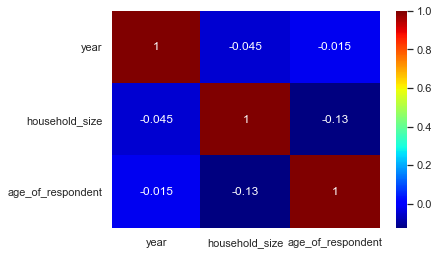

In [19]:
sns.heatmap(xtrain.corr(),annot=True,cmap="jet")

# Frequency distribution
#### bar plot showing the frequency of each category and highlight the 5% mark with a red line

In [20]:
xtrain.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'bank_account'],
      dtype='object')

In [21]:
country_freq = xtrain['country'].value_counts()/len(xtrain)
year_freq = xtrain['year'].value_counts()/len(xtrain)
household_size_freq = xtrain['household_size'].value_counts()/len(xtrain)
relationship_with_head_freq = xtrain['relationship_with_head'].value_counts()/len(xtrain)
marital_status_freq = xtrain['marital_status'].value_counts()/len(xtrain)
education_level_freq = xtrain['education_level'].value_counts()/len(xtrain)
job_type_freq = xtrain['job_type'].value_counts()/len(xtrain)

#### 5. Let's make a bar plot showing the frequency of each category and highlight the 5% mark with a red line:

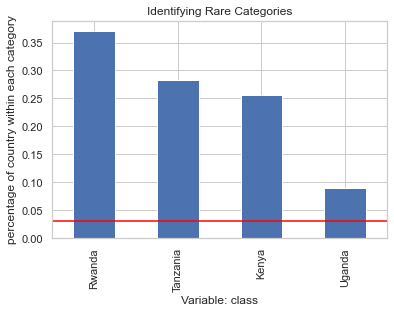

In [22]:
fig = country_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.03, color='red')
fig.set_ylabel('percentage of country within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

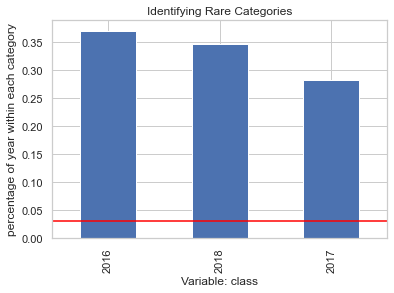

In [23]:
fig = year_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.03, color='red')
fig.set_ylabel('percentage of year within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

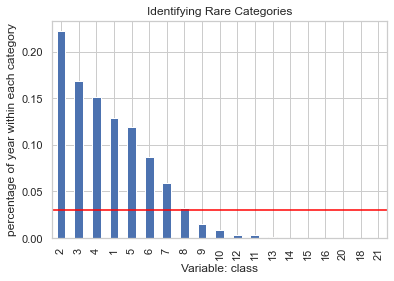

In [24]:
fig = household_size_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.03, color='red')
fig.set_ylabel('percentage of year within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

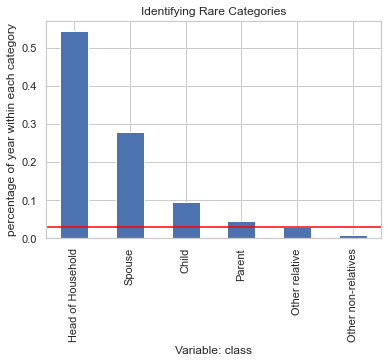

In [25]:
fig = relationship_with_head_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.03, color='red')
fig.set_ylabel('percentage of year within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

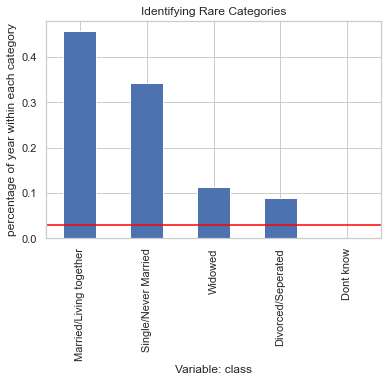

In [26]:
fig = marital_status_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.03, color='red')
fig.set_ylabel('percentage of year within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

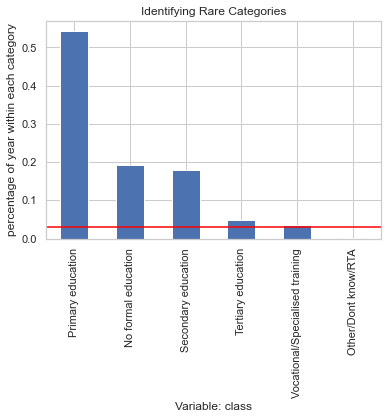

In [27]:
fig = education_level_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.03, color='red')
fig.set_ylabel('percentage of year within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

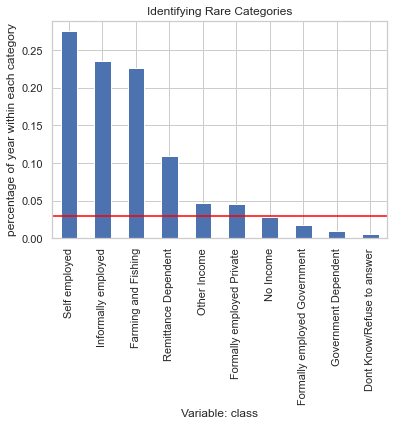

In [28]:
fig = job_type_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.03, color='red')
fig.set_ylabel('percentage of year within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

# 4.Encoding <a class='nkybz' id='4'></a>
[Back to Table of Content](#TOC)

In [29]:
cat_cols = xtrain.loc[:,xtrain.dtypes==object].columns
display(cat_cols)
display(xtrain[cat_cols].nunique().sort_values(ascending=False))

Index(['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'bank_account'],
      dtype='object')

job_type                  10
education_level            6
relationship_with_head     6
marital_status             5
country                    4
bank_account               2
gender_of_respondent       2
cellphone_access           2
location_type              2
dtype: int64

In [30]:
display(xtrain[cat_cols].nunique())
display(xtest[cat_cols].nunique())
#display(test[cat_cols].nunique())

country                    4
location_type              2
cellphone_access           2
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
bank_account               2
dtype: int64

country                    4
location_type              2
cellphone_access           2
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
bank_account               2
dtype: int64

## One hot encoding

# 5.Handling Missing Values <a class='nkybz' id='5'></a>
[Back to Table of Content](#TOC)

In [31]:
xtrain.isna().sum().any(),xtest.isna().sum().any(),test.isna().sum().any()

(False, False, False)

# 5.1 Explore <a class='nkybz' id='5.1'></a>
[Back to Table of Content](#TOC)

# 6.Outliers <a class="nkybz" id='6'></a>
[Back to Table of Content](#TOC)

# 7.Transformaing <a class='nkybz' id='7'></a>
[Back to Table of Content](#TOC)

# 8.Feature Engineering <a class='nkybz' id='8'></a>
[Back to Table of Content](#TOC)

### Combining multiple features with statistical operations

In [32]:

#df_t = df[features].agg(['sum','prod','mean','std', 'max', 'min'], axis='columns').


### Combining pairs of features with mathematical functions

# 9.Feature Selection <a class="nkybz" id='9'></a>
[Back to Table of Content](#TOC)

# 10.Model Prep <a class='nkybz' id='10'></a>
[Back to Table of Content](#TOC)

In [33]:
xtrain.shape,xtest.shape,test.shape

((16466, 12), (7058, 12), (10086, 12))

In [34]:
final_cols =xtrain.drop(['bank_account'],axis=1).columns
display(len(final_cols))
final_cols

11

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [35]:
xtrain_final=xtrain[final_cols].copy()
xtest_final=xtest[final_cols].copy()
test_final=test[final_cols].copy()

In [36]:
xtrain_final.isna().sum().any(),xtest_final.isna().sum().any(),test_final.isna().sum().any()

(False, False, False)

In [37]:
cat_1hot_f = ['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type']
#cat_ord_f = 
num_f = ['age_of_respondent']

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [39]:
numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_1hot_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_ord_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ord', OrdinalEncoder())
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_f),
    ('onehot',categorical_1hot_transformer,cat_1hot_f),
    #('ord', categorical_ord_transformer, cat_ord_f)
])
#X = full_pipeline.fit_transform(x) 

In [40]:
preprocessor.fit(xtrain_final)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age_of_respondent']),
                                ('onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['country', 'year', 'location_type',
                                  'cellphone_access', 'household_size',
                                  'gender_of_respondent',
                                  'relationship_with_head', 'marital_status',
                                  'education_level', 'job_type'])])

In [41]:
X_train = preprocessor.transform(xtrain_final)
X_test = preprocessor.transform(xtest_final)
comp_test = preprocessor.transform(test_final)

In [42]:
X_train.shape,X_test.shape,comp_test.shape

((16466, 60), (7058, 60), (10086, 60))

In [43]:
y_train,y_test = ytrain,ytest

# 11.Feature Importance <a class='nkybz' id='11'></a>
[Back to Table of Content](#TOC)

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5,shuffle=False)

In [46]:
from sklearn.ensemble import  ExtraTreesClassifier,RandomForestClassifier

In [47]:
rf=RandomForestClassifier(random_state=2022)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2022)

In [48]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.983
RF test accuracy: 0.861


In [49]:
feature_importances = rf.feature_importances_
num_attribs = list(num_f)
cat_1hot_attribs = list(cat_1hot_f)
#cat_ord_attribs = list(cat_ord_f)
attributes = num_attribs + cat_1hot_attribs #+ cat_ord_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3305927185827329, 'age_of_respondent'),
 (0.020895780054662784, 'marital_status'),
 (0.019991584753095332, 'education_level'),
 (0.017154779979870645, 'country'),
 (0.017033896052064592, 'job_type'),
 (0.008164963784783407, 'gender_of_respondent'),
 (0.008055998284814457, 'relationship_with_head'),
 (0.007732914512721107, 'location_type'),
 (0.006393525933769575, 'year'),
 (0.0063438451332852135, 'cellphone_access'),
 (0.005935229301365571, 'household_size')]

In [50]:
lait = lgb.LGBMClassifier(random_state=42)
lait.fit(X_train,y_train)

LGBMClassifier(random_state=42)

In [51]:
print("lait train accuracy: %0.3f" % lait.score(X_train, y_train))
print("lait test accuracy: %0.3f" % lait.score(X_test, y_test))

lait train accuracy: 0.902
lait test accuracy: 0.888


In [52]:
feature_importances_lait = lait.feature_importances_
sorted(zip(feature_importances_lait, attributes), reverse=True)

[(932, 'age_of_respondent'),
 (146, 'marital_status'),
 (88, 'location_type'),
 (84, 'country'),
 (57, 'job_type'),
 (55, 'year'),
 (49, 'cellphone_access'),
 (33, 'relationship_with_head'),
 (25, 'education_level'),
 (0, 'household_size'),
 (0, 'gender_of_respondent')]

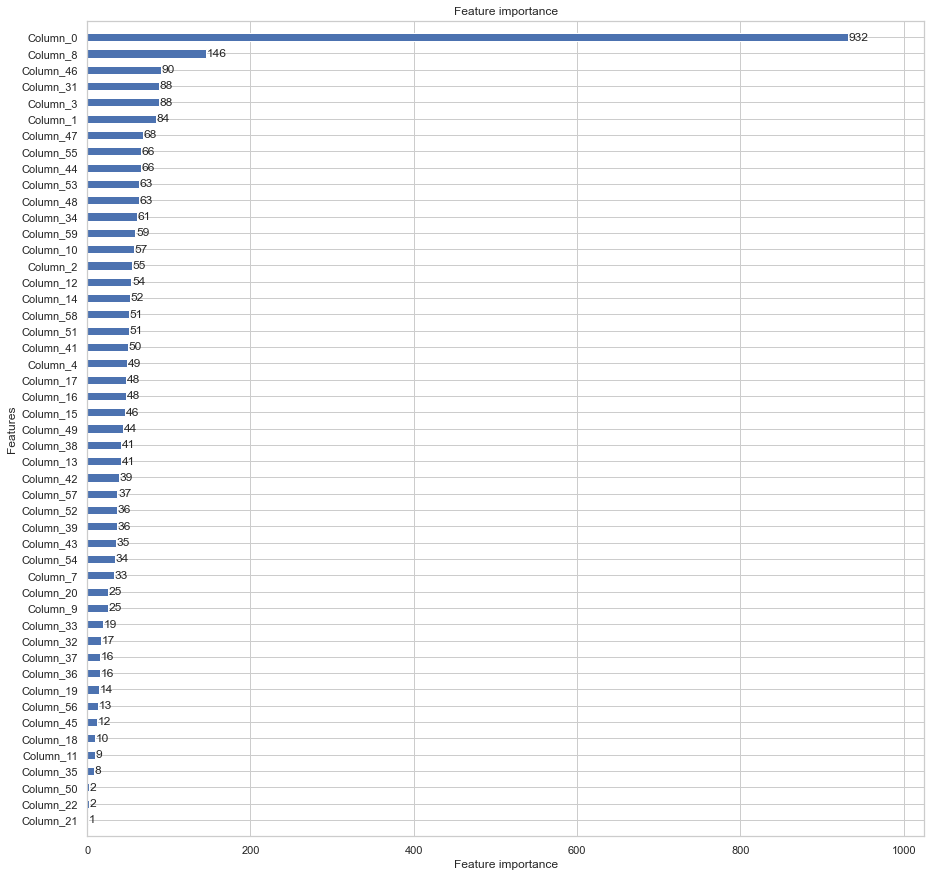

In [53]:
# FI diagram drawing
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
lgb.plot_importance(lait,ax = axes,height = 0.5)
#plt.savefig('important_features_lait_roundmissForest_NAfe1.png')
#plt.close()
plt.show()

In [54]:
xgbc = xgb.XGBClassifier(random_state=42,n_jobs=-1)
xgbc.fit(X_train,y_train)

[14:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
print("xgb train accuracy: %0.3f" % xgbc.score(X_train, y_train))
print("xgb test accuracy: %0.3f" % xgbc.score(X_test, y_test))

xgb train accuracy: 0.919
xgb test accuracy: 0.885


In [56]:
feature_importances_xgb = xgbc.feature_importances_
sorted(zip(feature_importances_xgb, attributes), reverse=True)

[(0.11869131, 'job_type'),
 (0.032492194, 'location_type'),
 (0.022231087, 'cellphone_access'),
 (0.02073022, 'country'),
 (0.016846096, 'marital_status'),
 (0.013263979, 'year'),
 (0.011063587, 'age_of_respondent'),
 (0.007364172, 'relationship_with_head'),
 (0.0, 'household_size'),
 (0.0, 'gender_of_respondent'),
 (0.0, 'education_level')]

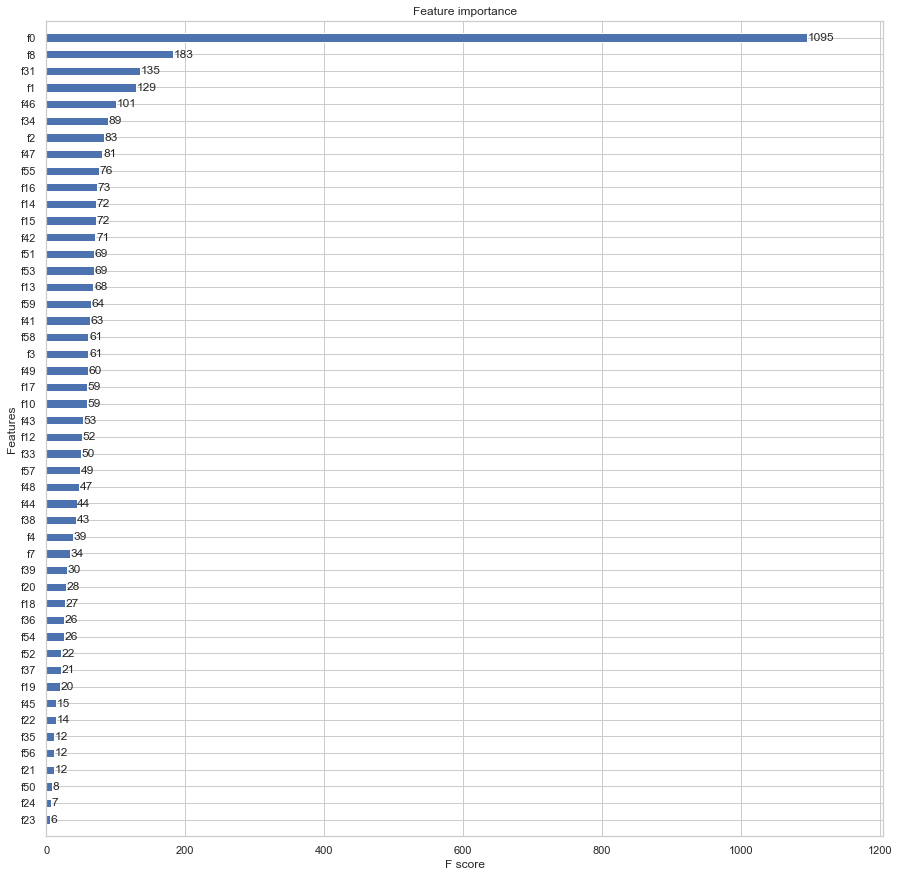

In [57]:
# FI diagram drawing
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(xgbc,ax = axes,height = 0.5)
#plt.savefig('important_features_xgb_roundmissForest_NAfe1.png')
#plt.close()
plt.show();

# 12.Modeling <a class='nkybz' id='12'></a>
[Back to Table of Content](#TOC)

In [58]:
lj = LogisticRegression(solver="liblinear").fit(X_train,y_train)#,class_weight={1:80,0:20}

In [59]:
%%time
lj = LogisticRegression(solver="liblinear").fit(X_train,y_train)#,class_weight={1:80,0:20}
#gnb = GaussianNB().fit(X_train,y_train)
#knnc = KNeighborsClassifier().fit(X_train,y_train)
dtc = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)#,class_weight={1:80,0:20}
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(X_train,y_train)#,class_weight={1:80,0:20}
gbmc = GradientBoostingClassifier(verbose=False,subsample=0.4).fit(X_train,y_train)
ext = ExtraTreesClassifier(n_jobs =-1,random_state=42).fit(X_train,y_train)
xgbc = XGBClassifier(subsample=0.4,random_state=42).fit(X_train,y_train)#,scale_pos_weight=75
lgbmc = LGBMClassifier(subsample=0.4,random_state=42).fit(X_train,y_train)#,class_weight={1:80,0:20}
catbc = CatBoostClassifier(verbose=False,random_state=42,subsample=0.4).fit(X_train,y_train)#,scale_pos_weight=75

[14:24:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 5min 18s


In [60]:
%%time
modelsc = [lj,dtc,rfc,gbmc,ext,lgbmc,catbc,xgbc]#,gnb,knnc
for model in modelsc:
    name = model.__class__.__name__
    y_pred = model.predict_proba(X_test)[:,1]
    y_proba = cross_val_predict(model,X_test,y_test,cv=3,method="predict_proba")
    y_score = y_proba[:,1]
    AreaUnderCurve =roc_auc_score(y_test,y_score)
    print(name + ": ")
    print("AUC:",roc_auc_score(y_test,y_score))
    print("=" * 30)

LogisticRegression: 
AUC: 0.8545255703083939
DecisionTreeClassifier: 
AUC: 0.6500159432850401
RandomForestClassifier: 
AUC: 0.812480589340794
GradientBoostingClassifier: 
AUC: 0.8548387953048104
ExtraTreesClassifier: 
AUC: 0.7798686910380488
LGBMClassifier: 
AUC: 0.8418012195866492
CatBoostClassifier: 
AUC: 0.8573032854116786
[14:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:06] WARNING: C:/Users/Administrator/workspace

####  %%time or 
import time
start_time = time.time()
print('Start time:', time.strftime("%H:%M:%S",time.gmtime(start_time)))

### ... code.... some cells

second_time = time.time() - start_time
print('Time Taken:', time.strftime("%H:%M:%S",time.gmtime(second_time)))

# Grid Search

##### 
%%time
estimator_lait = lgb.LGBMClassifier(
  n_jobs=-1,random_state=42,metric='auc',subsample=0.1)
params_grid={
    'boosting_type':['gbdt','goss','rf'],
    'learning_rate':[0.111,0.1,0.15],
    'scale_pos_weight':[99,95,97,80],
    'max_depth':[5,10,15],
    'num_leaves':[150,90,50],
    'min_child_samples':[20,30]
}
gridsearch_estimator_lait = GridSearchCV(estimator_lait,params_grid)
gridsearch_estimator_lait.fit(X_train,y_train,
                             eval_metric='auc',
                             eval_set=[(X_val,y_val)],early_stopping_rounds=5)
gridsearch_estimator_lait.best_params_

lait = lgb.LGBMClassifier(learning_rate=0.111,max_depth=15,min_child_samples=20, n_estimators=30,num_leaves= 90,
                          scale_pos_weight= 97,
metric="auc" ,subsample=0.1)
lait.fit(X_train,y_train,eval_metric="auc",
        eval_set=[(X_val,y_val)],
        early_stopping_rounds=5)

In [61]:
comp_test.shape,test.shape

((10086, 60), (10086, 12))

In [62]:
sub = test.index.to_frame()
sub['Target']=0

In [63]:
sub.head()

,uniqueid,Target
uniqueid,,
uniqueid_6056 x Kenya,uniqueid_6056 x Kenya,0
uniqueid_6060 x Kenya,uniqueid_6060 x Kenya,0
uniqueid_6065 x Kenya,uniqueid_6065 x Kenya,0
uniqueid_6072 x Kenya,uniqueid_6072 x Kenya,0
uniqueid_6073 x Kenya,uniqueid_6073 x Kenya,0


In [64]:
#lj ,catbc

In [65]:
preds_lait = catbc.predict(comp_test)
preds_lait = pd.DataFrame(preds_lait)#,index=test.index)
preds_lait = preds_lait.rename(columns={0:"bank_account"}).replace({"Yes":1,"No":0})
preds_lait.head()

,bank_account
0,1
1,1
2,0
3,0
4,0


In [66]:
preds_lait.shape,sub.shape
display(preds_lait['bank_account'].value_counts())

0    9347
1     739
Name: bank_account, dtype: int64

In [67]:
#test = test.reset_index()
test.head(2)

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,Target
uniqueid,,,,,,,,,,,,
uniqueid_6056 x Kenya,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,0
uniqueid_6060 x Kenya,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,0


In [69]:
preds_lait['uniqueid'] = test.index
preds_lait.head(5)

,bank_account,uniqueid
0,1,uniqueid_6056 x Kenya
1,1,uniqueid_6060 x Kenya
2,0,uniqueid_6065 x Kenya
3,0,uniqueid_6072 x Kenya
4,0,uniqueid_6073 x Kenya


In [70]:
submission = pd.DataFrame({
        "uniqueid": preds_lait['uniqueid'],
        "bank_account": preds_lait['bank_account']
    })
#submission.to_csv('cat_baseline0_financial_inclusion.csv', index=False)
submission.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


# 13.Ensemble <a class='nkybz' id='13'></a>
[back to Table of Content](#TOC)

# score <a class="kibeFinancialInclusionAfrica" id='score'></a>
[Back to Table of Content](#TOC)  
**ID** = wWDwN5pu <br>
**filename** = cat_baseline0_financial_inclusion.csv<br>
**score** = 0.111937338 <br>
**time** = 05-Jan-2023 13:52

# Next <a class='KibeFinancialInclusionAfrica' id='next'></a>
[Back to Table of Content](#TOC)

- Include frequency distribution
- create submition file
- create a subplot for the frequency distribution plot
- explore more visualization eg facetgrid, category visualizations
- edit the baseline notebook class to "KibeFinancialInclusionAfrica"
- find how get the names for feature importance plot for light , xgb, 
- use stratified k folds
- interprate the plot plotted
- Error analysis  compare the predicted values aganist the actual for test set work with predicted probabilities
- Create a baseline 0 financila inclusion in Africa using R
- use Mean Absolute Error as the evaluation metric
- write a report for the baseline notebook
<br>
<br>
<br>
- explore lazy predictor
- explore pandas profiling
